# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
len(df)

156

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [5]:
#медиана
import statistics
statistics.median(df['Freedom'])

71.0

In [6]:
#математическое ожидание
import statistics
np.mean(df['Freedom'])

78.0

In [8]:
#мода
df["Freedom"].mode()[0]

1.0

In [12]:
#стандартное отклонение
x = df["Freedom"].std()
x

44.88875137492688

In [13]:
#дисперсия
x**2

2015.0000000000002

In [ ]:
#выбросы (если есть)

In [44]:
# размах для колонки Freedom
duration_range = max(df["Freedom"]) - min(df["Freedom"])
print(duration_range)

154.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

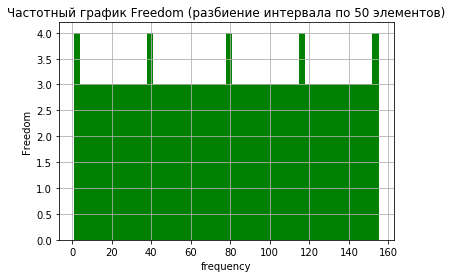

In [47]:
n, bins, patches = plt.hist(df['Freedom'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

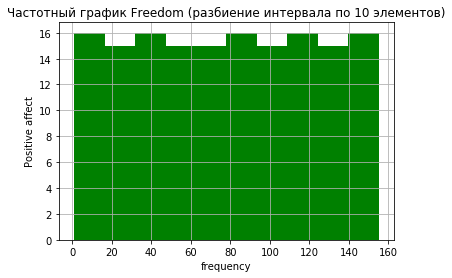

In [7]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

это равномерное распределение

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

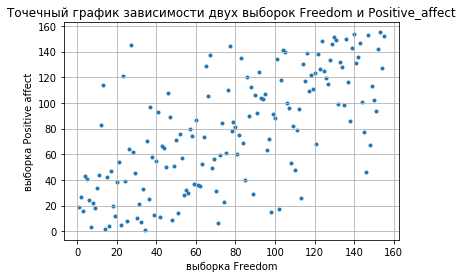

In [60]:
Freedom = df['Freedom'][~(df["Freedom"].isna() | df["Positive affect"].isna())]
Positive_affect = df['Positive affect'][~(df["Freedom"].isna() | df["Positive affect"].isna())]
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive_affect')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.')

Коэффициент корреляции Пирсона: 0.6817698430601656


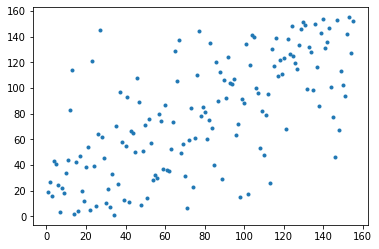

In [63]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Freedom, Positive_affect)
plt.scatter(Freedom, Positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [69]:
np.mean(df["Freedom"])

78.0

In [70]:
df['Freedom'] = df['Freedom'] - np.mean(df['Freedom'])
print(np.mean(df['Freedom']))

0.0


In [71]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

df['Freedom'] = min_max_scaler.fit_transform(np.array(df['Freedom']).reshape(-1, 1))
print(min(df['Freedom']))
print(max(df['Freedom']))

-1.0
1.0


Построить матрицу корреляций для всех колонок таблицы

In [72]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


Загрузить следующую таблицу: 

In [73]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

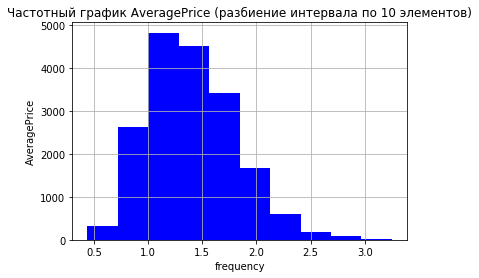

In [74]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.20831704848788477


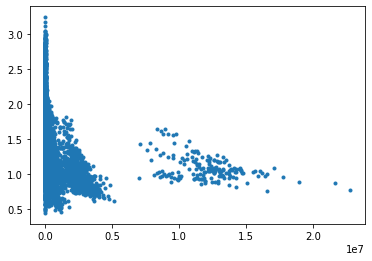

In [78]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
plt.scatter(df['4046'], df['AveragePrice'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)